<a href="https://colab.research.google.com/github/atikahlestar/Data-Science/blob/main/Project_7_Predicting_Delivery_Status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 7
Memprediksi Status Pengiriman dari Perusahaan E-Commerce untuk Meningkatkan Perhitungan Estimasi Pengiriman Mereka

### E-Commerce Delivery Dataset
 Dataset tentang informasi transaksi dan setiap status pengiriman.

### Data Source :
https://www.kaggle.com/datasets/prachi13/customer-analytics

### Masalah Bisnis
    Bagaimana cara meningkatkan pendapatan dengan memprediksi status pengiriman yang akurat dari perusahaan e-commerce?

### Tujuan
    Membangun model klasifikasi untuk menentukan status pengiriman

### Data Cleansing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/Shared drives/atikahlestari31/Project/Dataset/E-Commerce Shipping Data.csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(file_path)
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
df = df.rename(columns = {"Reached.on.Time_Y.N" : "on_time"})
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,on_time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  on_time              10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [7]:
## Missing Values

In [8]:
df.isna().sum()

,0
ID,0
Warehouse_block,0
Mode_of_Shipment,0
Customer_care_calls,0
Customer_rating,0
Cost_of_the_Product,0
Prior_purchases,0
Product_importance,0
Gender,0
Discount_offered,0


In [9]:
## Check Outliers

In [10]:
df_num = df.select_dtypes(["int64"])
col_num = df_num.columns
col_num

Index(['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'on_time'],
      dtype='object')

In [11]:
for col in col_num:
    print(f"Running for {col}")
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    print(iqr)
    fence_high = q3 + 1.5*iqr
    fence_low = q1 - 1.5*iqr
    outliers = df[(df[col] < fence_low) | (df[col] > fence_high)]
    print(outliers.shape)

Running for ID
5499.0
(0, 12)
Running for Customer_care_calls
2.0
(0, 12)
Running for Customer_rating
2.0
(0, 12)
Running for Cost_of_the_Product
82.0
(0, 12)
Running for Prior_purchases
1.0
(1003, 12)
Running for Discount_offered
6.0
(2209, 12)
Running for Weight_in_gms
3210.5
(0, 12)
Running for on_time
1.0
(0, 12)


In [12]:
for col in col_num:
    print(f"Running for {col}")
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    print(iqr)
    fence_high = q3 + 1.5*iqr
    fence_low = q1 - 1.5*iqr
    outliers = df[(df[col] < fence_low) | (df[col] > fence_high)]
    df = df[(df[col] >= fence_low) & (df[col] <= fence_high)]

Running for ID
5499.0
Running for Customer_care_calls
2.0
Running for Customer_rating
2.0
Running for Cost_of_the_Product
82.0
Running for Prior_purchases
1.0
Running for Discount_offered
6.0
Running for Weight_in_gms
3288.5
Running for on_time
1.0


In [13]:
df.shape

(7971, 12)

In [14]:
## Check Duplicated

In [15]:
df.duplicated().sum()

0

### EDA

In [16]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,on_time
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
10,11,C,Flight,3,4,189,2,medium,M,12,2888,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7971 entries, 3 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   7971 non-null   int64 
 1   Warehouse_block      7971 non-null   object
 2   Mode_of_Shipment     7971 non-null   object
 3   Customer_care_calls  7971 non-null   int64 
 4   Customer_rating      7971 non-null   int64 
 5   Cost_of_the_Product  7971 non-null   int64 
 6   Prior_purchases      7971 non-null   int64 
 7   Product_importance   7971 non-null   object
 8   Gender               7971 non-null   object
 9   Discount_offered     7971 non-null   int64 
 10  Weight_in_gms        7971 non-null   int64 
 11  on_time              7971 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 809.6+ KB


In [18]:
## Univariate Analysis

In [19]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,on_time
count,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000
mean,6460.916949,4.132982,2.993602,213.686238,3.282148,5.986953,3956.695772,0.495170
std,2750.646370,1.177638,1.413356,48.231331,0.991333,3.547644,1619.385342,0.500008
min,4.000000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,4380.500000,3.000000,2.000000,173.000000,3.000000,3.000000,1955.500000,0.000000
50%,6561.000000,4.000000,3.000000,220.000000,3.000000,6.000000,4520.000000,0.000000
75%,8782.500000,5.000000,4.000000,254.000000,4.000000,8.000000,5244.000000,1.000000
max,10999.000000,7.000000,5.000000,310.000000,5.000000,19.000000,6102.000000,1.000000


In [20]:
col_num = col_num.tolist()

In [21]:
col_num

['ID',
 'Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms',
 'on_time']

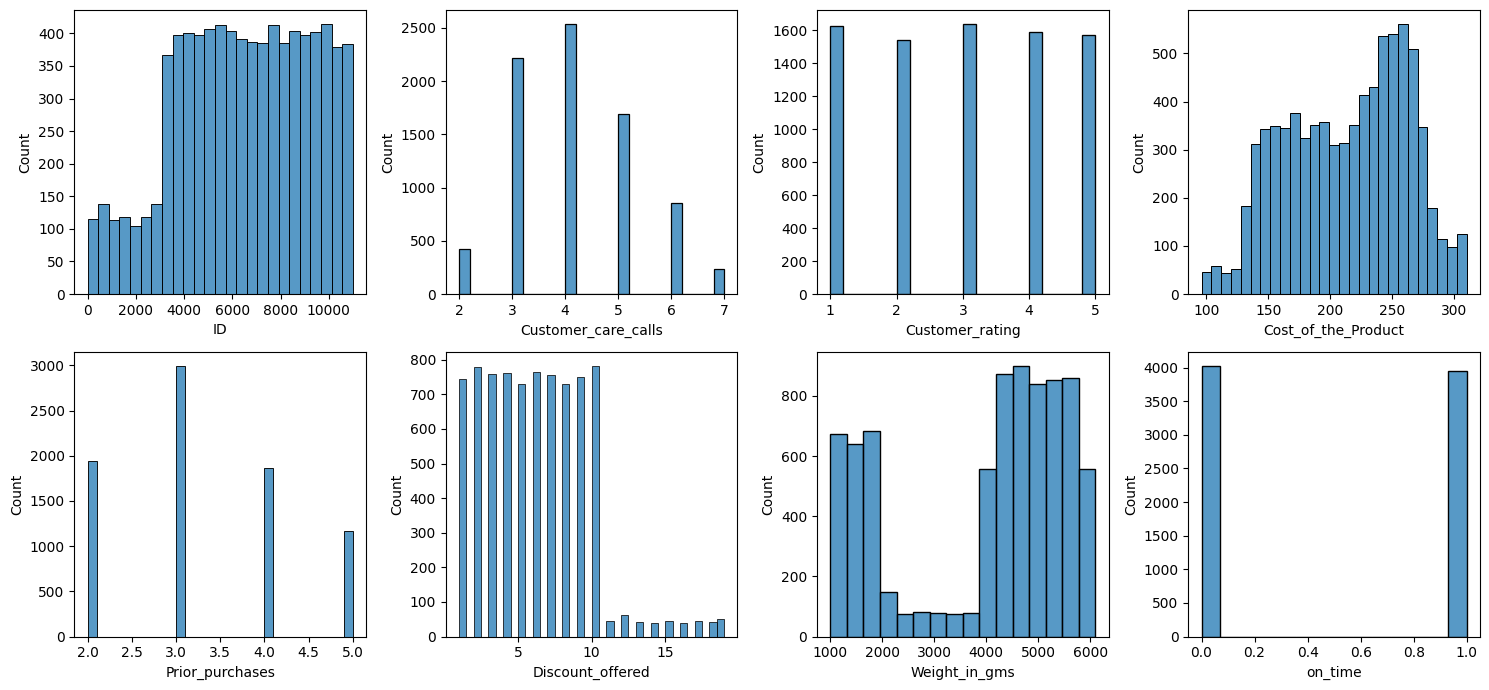

In [22]:
plt.figure(figsize = [15,7])
for i in range(len(col_num)):
    plt.subplot(2,4, i+1)
    sns.histplot(x = col_num[i], data = df)
    plt.tight_layout()

In [23]:
## Multivariate Analysis

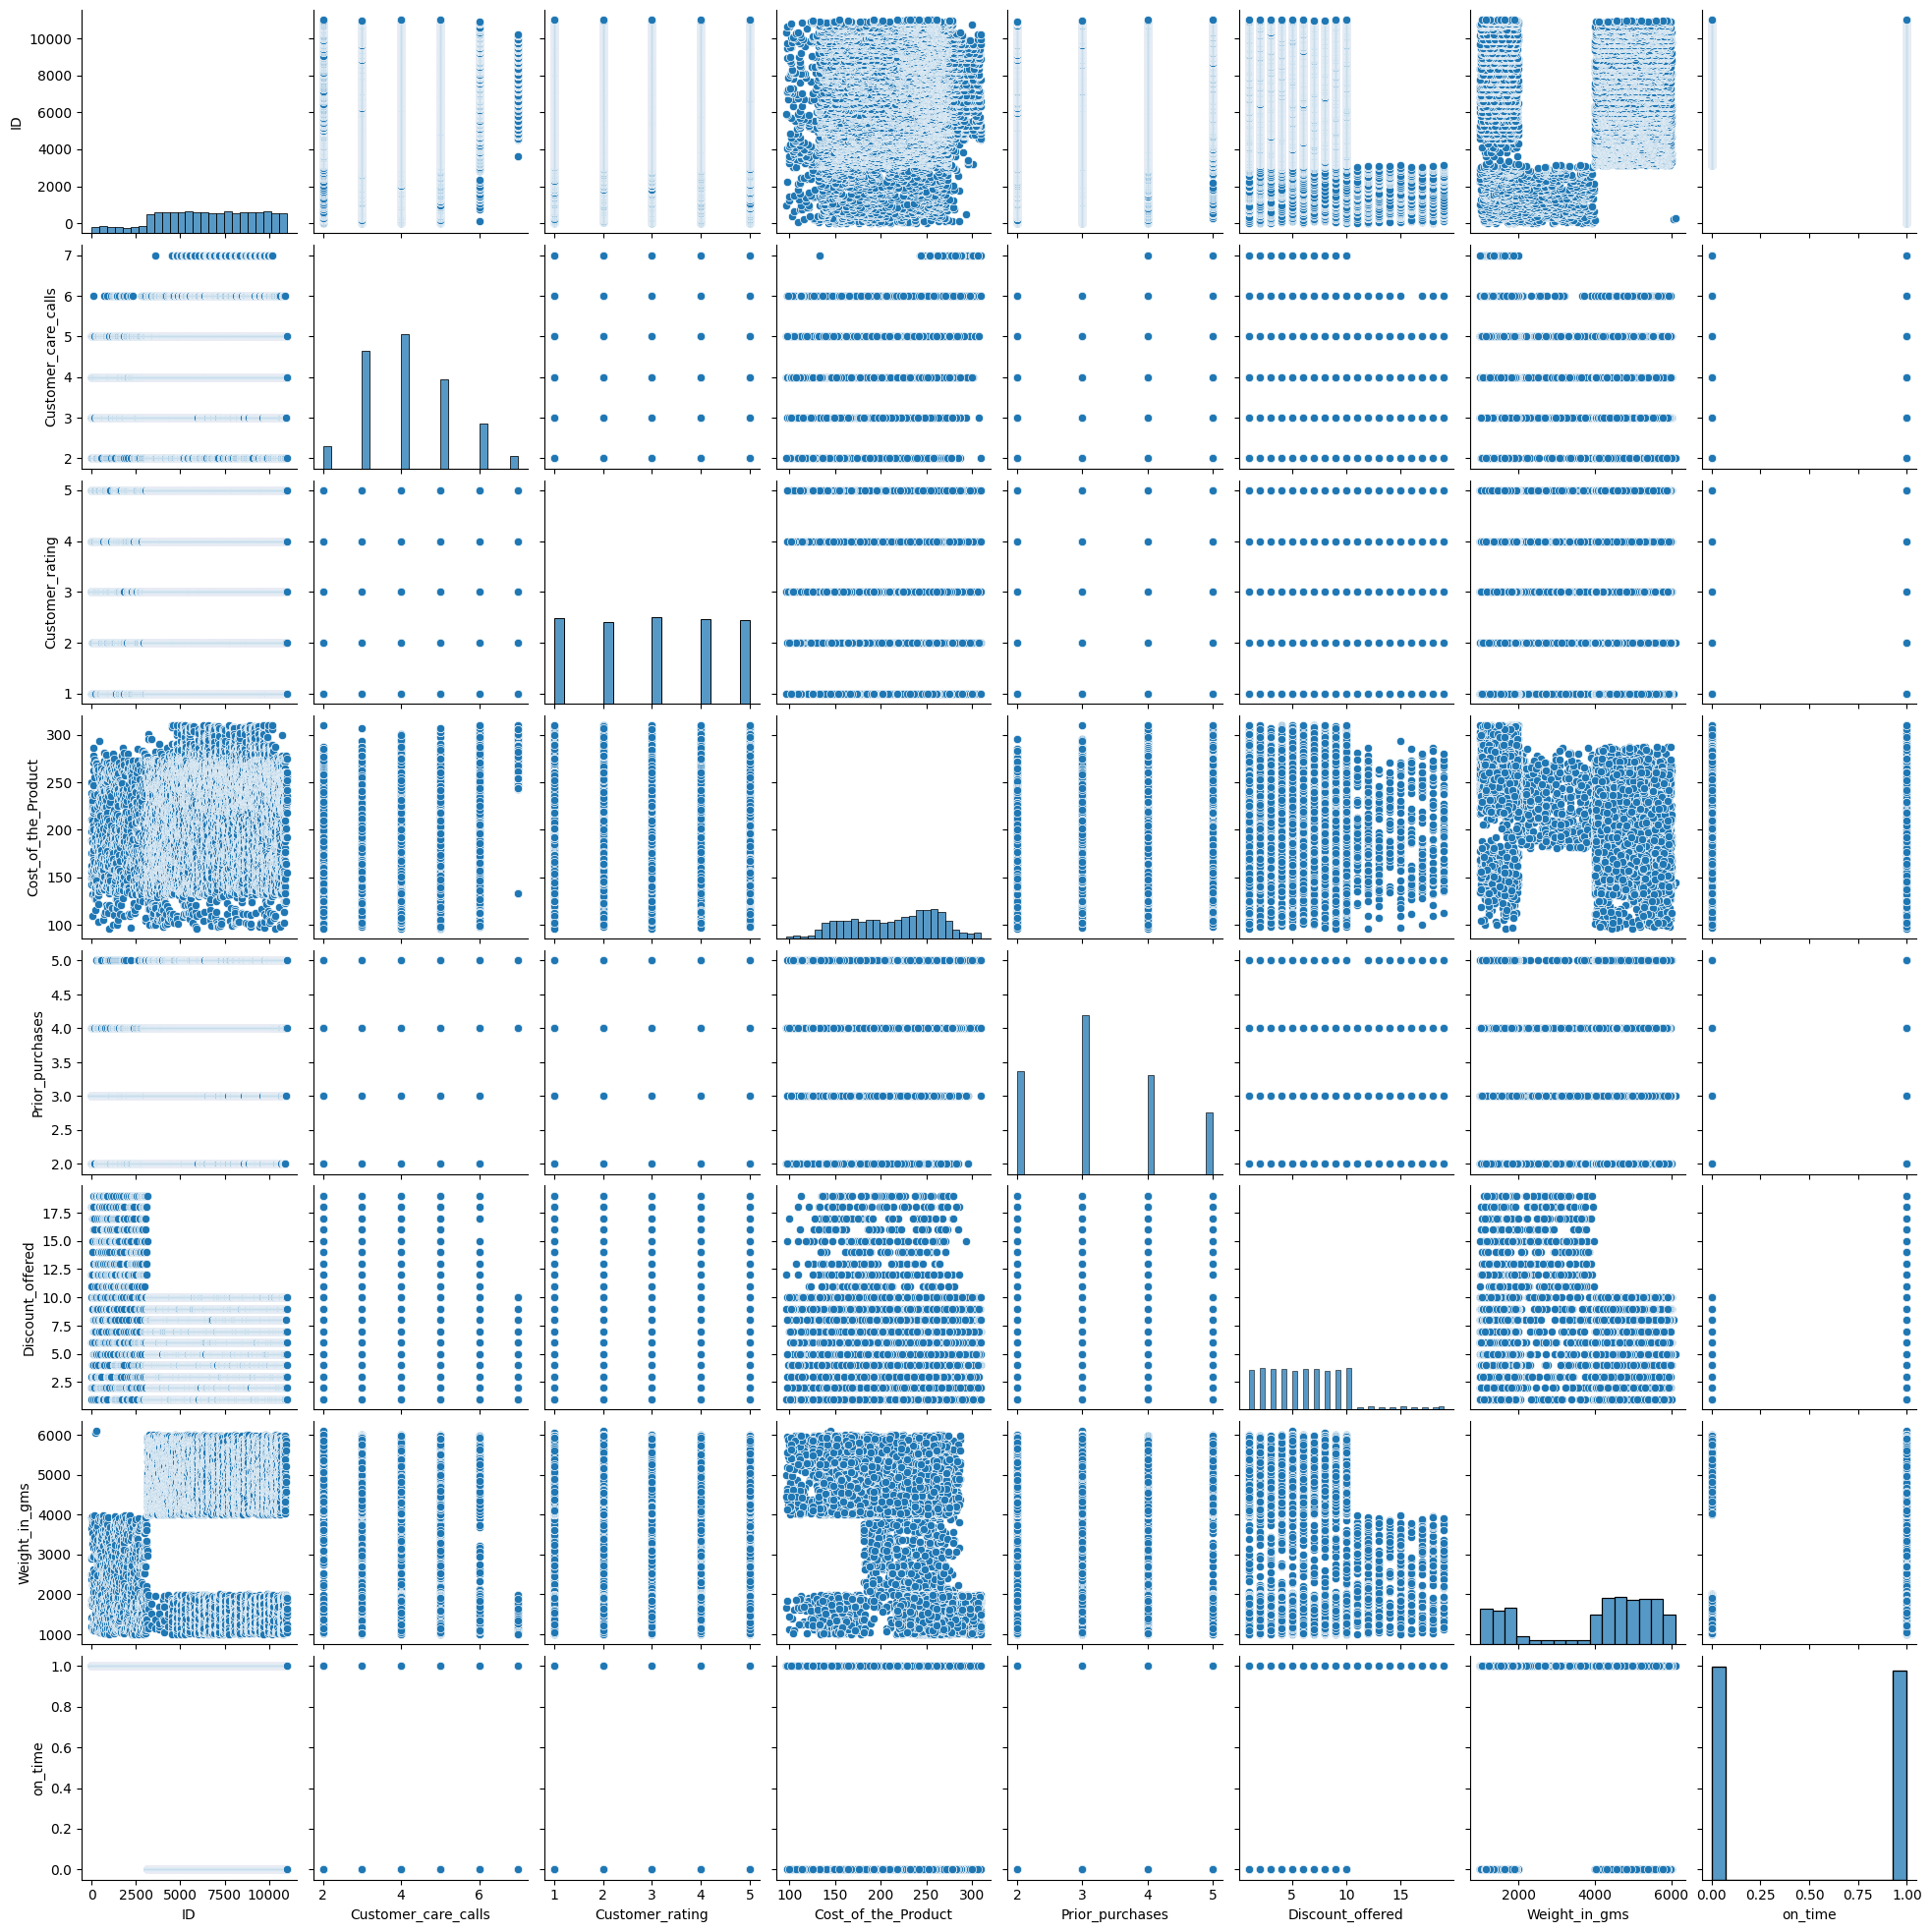

In [24]:
sns.pairplot(df[col_num])

<Axes: >

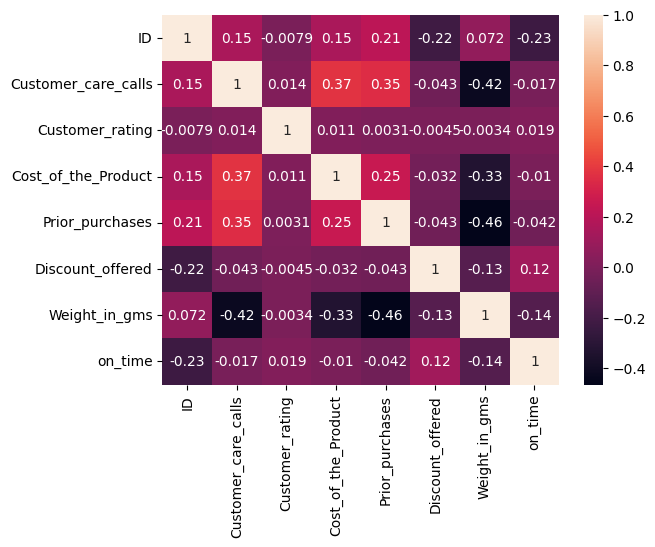

In [25]:
sns.heatmap(df[col_num].corr(), annot =True)

### Additional Data Preparation before Modeling

In [26]:
## Feature Engineering

In [27]:
df["cost_per_weight"] = df["Cost_of_the_Product"] / df["Weight_in_gms"]
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,on_time,cost_per_weight
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,0.149533
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1,0.114326
6,7,D,Flight,3,4,250,3,low,F,3,2371,1,0.105441
8,9,A,Flight,3,4,150,3,low,F,11,1861,1,0.080602
10,11,C,Flight,3,4,189,2,medium,M,12,2888,1,0.065443
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10992,10993,D,Ship,5,1,236,5,medium,M,3,1906,0,0.123820
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1,0.163849
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0,0.186047
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0,0.209524


In [28]:
## One Hot Encoding

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7971 entries, 3 to 10998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7971 non-null   int64  
 1   Warehouse_block      7971 non-null   object 
 2   Mode_of_Shipment     7971 non-null   object 
 3   Customer_care_calls  7971 non-null   int64  
 4   Customer_rating      7971 non-null   int64  
 5   Cost_of_the_Product  7971 non-null   int64  
 6   Prior_purchases      7971 non-null   int64  
 7   Product_importance   7971 non-null   object 
 8   Gender               7971 non-null   object 
 9   Discount_offered     7971 non-null   int64  
 10  Weight_in_gms        7971 non-null   int64  
 11  on_time              7971 non-null   int64  
 12  cost_per_weight      7971 non-null   float64
dtypes: float64(1), int64(8), object(4)
memory usage: 871.8+ KB


In [30]:
df = df.drop(columns = ["ID"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7971 entries, 3 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      7971 non-null   object 
 1   Mode_of_Shipment     7971 non-null   object 
 2   Customer_care_calls  7971 non-null   int64  
 3   Customer_rating      7971 non-null   int64  
 4   Cost_of_the_Product  7971 non-null   int64  
 5   Prior_purchases      7971 non-null   int64  
 6   Product_importance   7971 non-null   object 
 7   Gender               7971 non-null   object 
 8   Discount_offered     7971 non-null   int64  
 9   Weight_in_gms        7971 non-null   int64  
 10  on_time              7971 non-null   int64  
 11  cost_per_weight      7971 non-null   float64
dtypes: float64(1), int64(7), object(4)
memory usage: 809.6+ KB


In [31]:
df = pd.get_dummies(df)
df

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,on_time,cost_per_weight,Warehouse_block_A,Warehouse_block_B,...,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
3,3,3,176,4,10,1177,1,0.149533,False,True,...,False,False,True,False,False,False,False,True,False,True
5,3,1,162,3,12,1417,1,0.114326,False,False,...,False,True,True,False,False,False,False,True,True,False
6,3,4,250,3,3,2371,1,0.105441,False,False,...,True,False,True,False,False,False,True,False,True,False
8,3,4,150,3,11,1861,1,0.080602,True,False,...,False,False,True,False,False,False,True,False,True,False
10,3,4,189,2,12,2888,1,0.065443,False,False,...,False,False,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10992,5,1,236,5,3,1906,0,0.123820,False,False,...,True,False,False,False,True,False,False,True,False,True
10994,4,1,252,5,1,1538,1,0.163849,True,False,...,False,False,False,False,True,False,False,True,True,False
10995,4,1,232,5,6,1247,0,0.186047,False,True,...,False,False,False,False,True,False,False,True,True,False
10996,5,4,242,5,4,1155,0,0.209524,False,False,...,False,False,False,False,True,False,True,False,True,False


In [32]:
## Train Test Split

In [33]:
X = df.drop(columns= ["on_time"])
y = df["on_time"]

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5579, 20)
(2392, 20)
(5579,)
(2392,)


### Modeling

In [37]:
## Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
## Hyperparameter Tuning

params = {
    "max_depth" : [2,3,5,7,10,20],
    "min_samples_leaf" : [25,50,75,100,200]
}

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid = params,
                           cv = 5,
                           scoring = "roc_auc"
                          )

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 5, 7, 10, 20],
                         'min_samples_leaf': [25, 50, 75, 100, 200]},
             scoring='roc_auc')

In [44]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=200)

### Evaluation

In [45]:
from sklearn.metrics import precision_score

y_dtree = dtree.predict(X_test)
y_rf = rf.predict(X_test)
y_rf_best = rf_best.predict(X_test)

print(precision_score(y_test, y_dtree, pos_label = 1, average = "binary"))
print(precision_score(y_test, y_rf, pos_label = 1, average = "binary"))
print(precision_score(y_test, y_rf_best, pos_label = 1, average = "binary"))

0.5383275261324042
0.5895691609977324
0.637065637065637


In [46]:
from sklearn.metrics import recall_score

In [47]:
print(recall_score(y_test, y_dtree, pos_label = 1, average = "binary"))
print(recall_score(y_test, y_rf, pos_label = 1, average = "binary"))
print(recall_score(y_test, y_rf_best, pos_label = 1, average = "binary"))

0.5241730279898219
0.4410517387616624
0.4198473282442748


In [48]:
from sklearn.metrics import roc_auc_score

y_prob_dtree = dtree.predict_proba(X_test)[:,1]
y_prob_rf = rf.predict_proba(X_test)[:,1]
y_prob_rf_best = rf_best.predict_proba(X_test)[:,1]

In [49]:
print(roc_auc_score(y_test, y_prob_dtree))
print(roc_auc_score(y_test, y_prob_rf))
print(roc_auc_score(y_test, y_prob_rf_best))

0.5436199022883982
0.610585982923195
0.6224181488776871


### Kesimpulan Bisnis

#### Dampak Bisnis

In [50]:
# Final model = Random Forest with Hyperparameter Tuning
# Precision = 62%, Recall = 40%

# Asumsikan dari setiap 100 transaksi, 20 akan terlambat (tidak tepat waktu)

# Sebelum model:
    # Kita tidak tahu transaksi mana yang akan terlambat, jadi kita memberikan estimasi yang sama untuk semua transaksi.
    # Hanya 80 transaksi yang akan dilakukan lagi.
    # Pendapatan = 80 * 100K = 8 juta.

# Setelah model:
    # Kita tahu transaksi mana yang akan terlambat, dan kita bisa memberikan estimasi waktu yang lebih lama serta memberikan komunikasi tambahan.
    # Transaksi ulang tambahan:
        # Precision * late : 0.62* 20 = 12
    # Pendapatan = (80 + 12) * 100K = 9,2 juta.